# HW1, Dudin George 201

## Preparing env

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df = pd.read_excel("dataset.xls")

## Task 1 

### Plot points

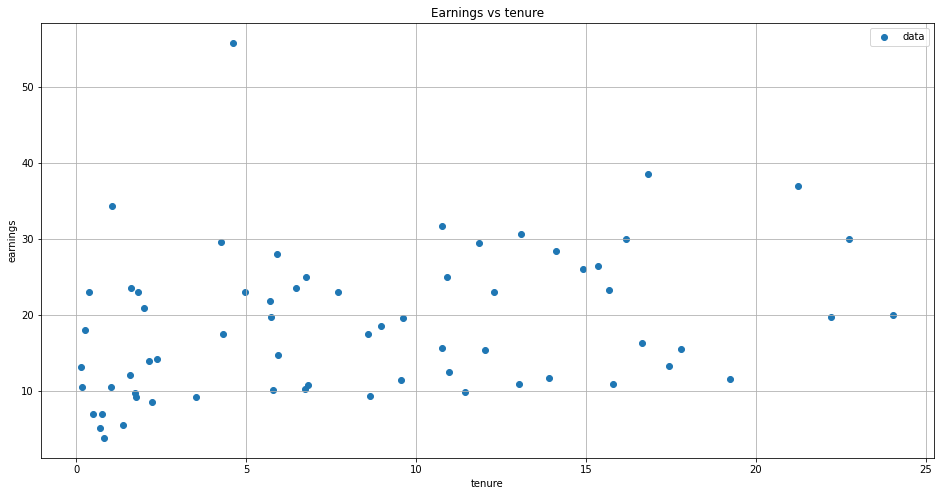

In [3]:
plt.figure(figsize=(16, 8))
plt.title("Earnings vs tenure")
plt.scatter(df["tenure"], df["earnings"], label='data')
plt.xlabel("tenure")
plt.ylabel("earnings")
plt.legend()
plt.grid()

### OLS model [earnings ~ tenure]

In [4]:
model_et = ols('earnings ~ tenure', data=df).fit()
print(model_et.summary())

                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     6.425
Date:                Wed, 05 Oct 2022   Prob (F-statistic):             0.0137
Time:                        23:41:04   Log-Likelihood:                -238.95
No. Observations:                  66   AIC:                             481.9
Df Residuals:                      64   BIC:                             486.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.0352      1.839      8.177      0.0

eval_env: 1


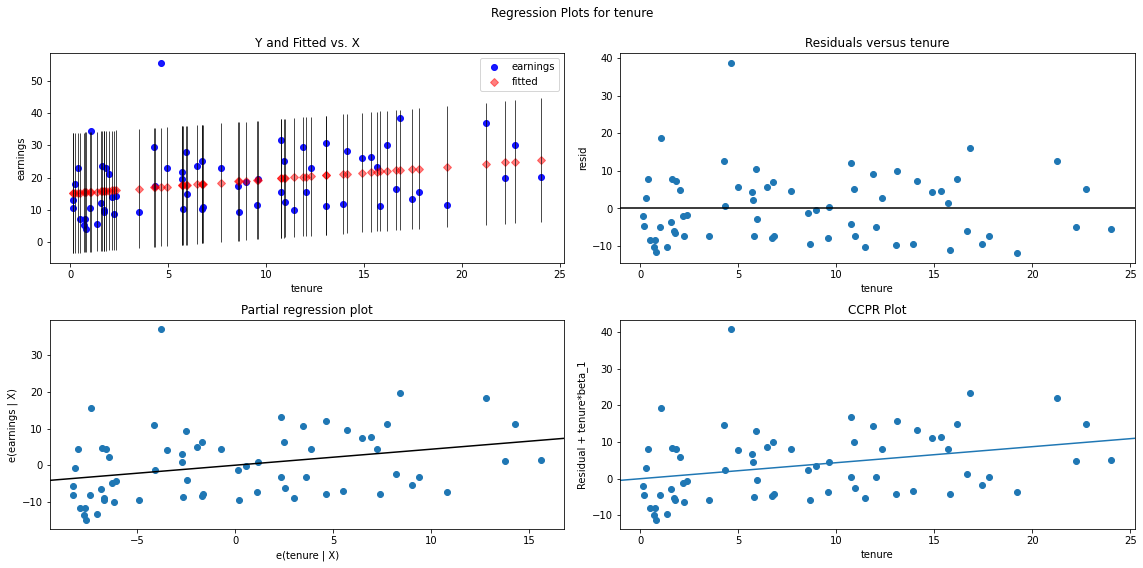

In [5]:
fig = plt.figure(figsize=(16,8))
fig = sm.graphics.plot_regress_exog(model_et, 'tenure', fig=fig)

### Сonclusion
 

We see weak correlation here on the graphs. Our conclusion is confirmed by the $R^2$ score, which tends to 0 (obviously, equals to 0.09).

What about coefs? If tenure is null => we will earn $\approx$ 15. Slope coef is positive, therefore earnings are increasing on average. 

## Task 2

Intercept term: $P_{value}$ = 0. Therefore, it's statistically important. 

Slope: $P_{value}$ = 0.014. 0.014 < 0.05, therefore, it's statistically important. 

Confidence interval for intercept: [11.362, 18.708]

Confidence interval for slope:     [0.092,  0.780]

Both of them don't include "0", therfore both of them are significant. 

### Hypothesis check

$H_0$ - regression without independent variable (just horizontal line) gives the same, or smaller error.

$H_1$ - our regression works better, than const-model.

$P_{value}$ = 0.014, $F_{statistic}$ = 6.425 $\Rightarrow$ we reject $H_0$.

### Conlusion

Our regression has a huge error, therefore we don't have contradiction with this result. 

## Task 3

In [6]:
model_es = ols('earnings ~ s', data=df).fit()
print(model_es.summary())

                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     7.090
Date:                Wed, 05 Oct 2022   Prob (F-statistic):            0.00979
Time:                        23:41:04   Log-Likelihood:                -238.64
No. Observations:                  66   AIC:                             481.3
Df Residuals:                      64   BIC:                             485.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5529      6.912      0.080      0.9

### First conclusion, without looking on the plots:
1) You can earn something without education (intercept $\approx$ 0.5).

2) More years of education - bigger salary (slope coef is positive).  

eval_env: 1


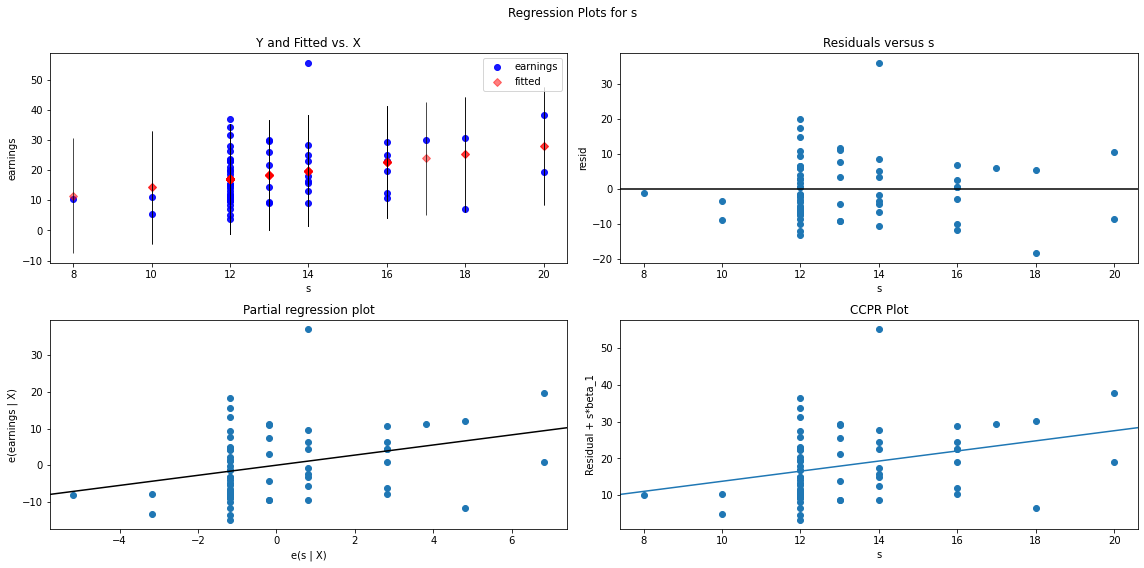

In [7]:
fig = plt.figure(figsize=(16,8))
fig = sm.graphics.plot_regress_exog(model_es, 's', fig=fig)

### Info from plots:

Now we see, that you can't work if you don't have education at all. However, each year of studying increases someones salary for $\approx$ 1.37.  

In [8]:
df['h'] = df['s'] - 12

model_eh = ols('earnings ~ h', data=df).fit()
print(model_eh.summary())

                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     7.090
Date:                Wed, 05 Oct 2022   Prob (F-statistic):            0.00979
Time:                        23:41:05   Log-Likelihood:                -238.64
No. Observations:                  66   AIC:                             481.3
Df Residuals:                      64   BIC:                             485.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0839      1.280     13.347      0.0

eval_env: 1


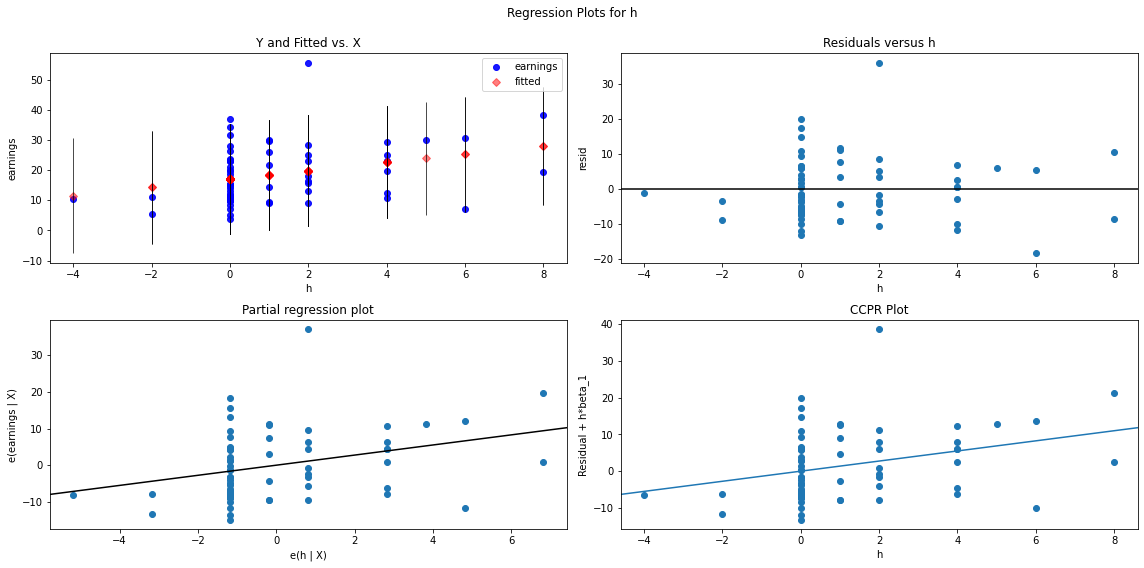

In [9]:
fig = plt.figure(figsize=(16,8))
fig = sm.graphics.plot_regress_exog(model_eh, 'h', fig=fig)

### Let's have a small dive into mathematics!

$E_{earnings}(S) = k_{S} \cdot S + b_{S} + \epsilon$

$E_{earnings}(H) = k_{H} \cdot S + b_{H} + \epsilon$

Therefore:

$E_{earnings}(S) = k_{S} \cdot S + b_{S} + \epsilon = k_{S} \cdot (H + 12) + b_{S} + \epsilon = k_{S} \cdot H + (b_{S} + 12k_{S}) + \epsilon$

As we can see, slope coef remains the same, however intercept changes (it's obvious).

## Task 4

In [10]:
for column in df.columns:
    if column == "s" or column == "earnings":
        continue
    
    model_intercept = ols(f'earnings ~ {column}', data=df).fit()
    model_noIntercept = ols(f'earnings ~ {column} - 1', data=df).fit()
    
    print("Column:", column)
    print("Intercept model, R^2:", model_intercept.rsquared)
    print("No intercept model, R^2:", model_noIntercept.rsquared)
    print('\n')

Column: age
Intercept model, R^2: 0.005023198990840028
No intercept model, R^2: 0.7964781048489843


Column: asvabc
Intercept model, R^2: 0.10822830429191055
No intercept model, R^2: 0.817599834848162


Column: height
Intercept model, R^2: 0.07143139202784055
No intercept model, R^2: 0.80562037869267


Column: hours
Intercept model, R^2: 0.046844469953179146
No intercept model, R^2: 0.7924455317618582


Column: siblings
Intercept model, R^2: 0.005356926344058932
No intercept model, R^2: 0.5003341371370557


Column: tenure
Intercept model, R^2: 0.09123047044273358
No intercept model, R^2: 0.6203515102140534


Column: weight
Intercept model, R^2: 0.017252146674425872
No intercept model, R^2: 0.7794498974018187


Column: wexp
Intercept model, R^2: 0.09203656734423982
No intercept model, R^2: 0.8013531597499239


Column: h
Intercept model, R^2: 0.09973070991328414
No intercept model, R^2: 0.30415062083908684




### Weight!

eval_env: 1


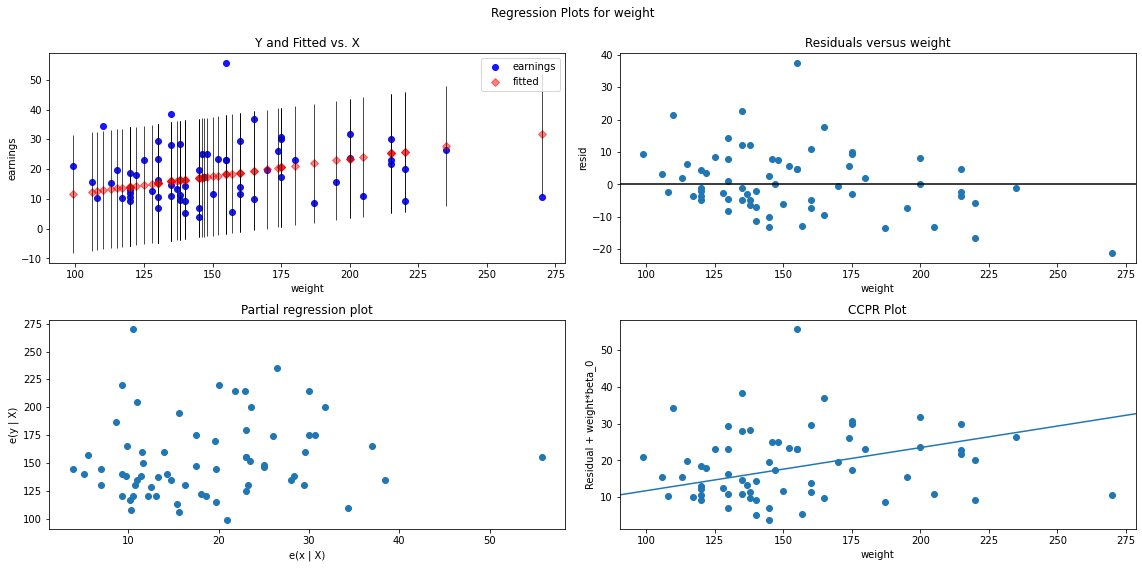

In [11]:
model_we = ols('earnings ~ weight - 1', data=df).fit()

fig = plt.figure(figsize=(16,8))
fig = sm.graphics.plot_regress_exog(model_we, 'weight', fig=fig)

### Conclusion on weight

Obviously, there is a light correlation between weight and earnings. It's interesting and strange, because we find out, that on average someones salary is bigger if he weights more. 

### WEXP age!


eval_env: 1


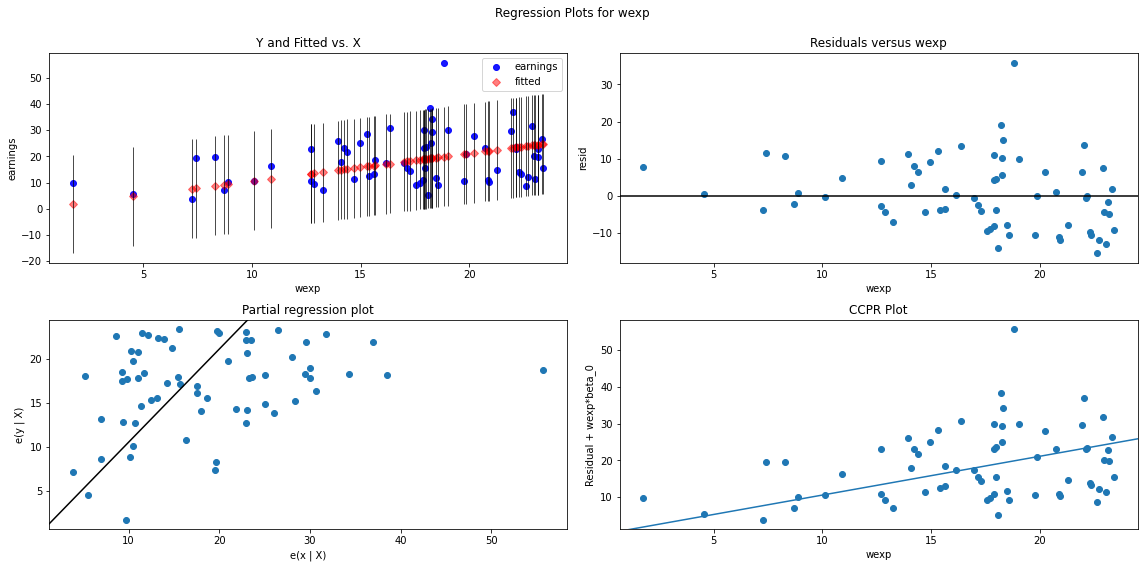

In [12]:
model_we = ols('earnings ~ wexp - 1', data=df).fit()

fig = plt.figure(figsize=(16,8))
fig = sm.graphics.plot_regress_exog(model_we, 'wexp', fig=fig)

### Conclusion on WEXP age

Here we can see correlation between wexp and earnings. It looks stronger, than correlation between Weight and earnings. That sounds logic:) Also, R^2 confirms my point of view, because this score is bigger for wexp ~ earnings relationship. 